In [18]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import matplotlib.pyplot as plt

init_array_bloom = np.load(open("stacked1x1.pickle", "rb"), allow_pickle = True)
init_array_bloom = np.flip(init_array_bloom, axis = 0)
init_array_ship = np.load(open("stacked1x1_ship.pickle", "rb"), allow_pickle = True)


# long 160 - 200
# lat 10 - 30
## define a function bbox that takes in a numpy array and returns a subset of the array
def bbox(data, i1, j1, i2, j2):
    return data[(i1):(i2), (j1):(j2)]

In [19]:
## test function bbox
bloom = bbox(init_array_bloom, 110, 60, 120, 80)
print(bloom.shape)
ship = bbox(init_array_ship, 110, 60, 120, 80)
print(ship.shape)

(10, 20, 10)
(10, 20, 10)


In [20]:
import scipy
def linear_regress(array1, array2):
    try:
        result = scipy.stats.linregress(array1, array2)
        if result.rvalue > 0.7:
            if result.slope > 100:
                return 1
            elif result.slope < -100:
                return -1
            else:
                return result.slope / 100
        else:
            return 0
    except:
        print(array1, array2)
        return 0

In [21]:
nibba = np.zeros((10, 20))
for indexi, row in enumerate(bloom):
    for indexj, col in enumerate(row):
        nibba[indexi][indexj] = linear_regress(ship[indexi][indexj], bloom[indexi][indexj])

non_zero = np.count_nonzero(nibba)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.     0.     8.1189 0.     0.     0.     0.     0.     0.     0.    ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.     0.0324 1.98   0.     0.     0.     0.     0.     0.     0.    ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
bloom_sum_per_year = (np.sum(bloom, axis = (0,1)) / 11) / 10000
ship_sum_per_year = (np.sum(ship, axis = (0,1)) / 11) / 1000

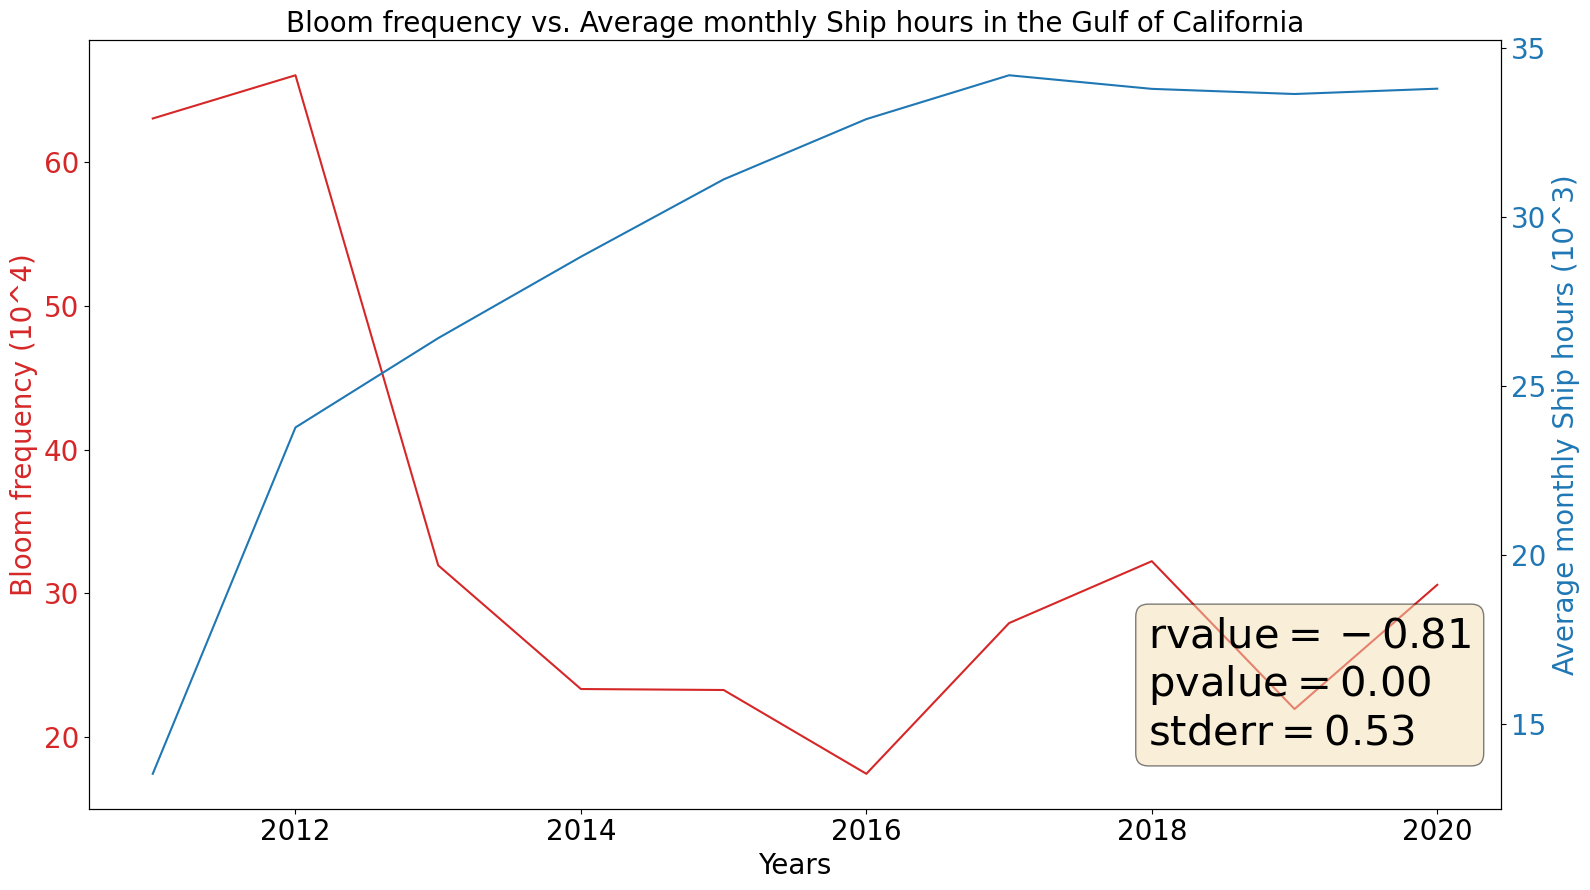

In [23]:
import scipy
result = scipy.stats.linregress(ship_sum_per_year, bloom_sum_per_year)
years = np.arange(2011, 2021)
x = ship_sum_per_year
y = bloom_sum_per_year


import matplotlib.pylab as pylab
params = {'legend.fontsize': 20,
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize': 20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)
fig, ax1 = plt.subplots(figsize = (16, 9))


color = 'tab:red'
ax1.set_title('Bloom frequency vs. Average monthly Ship hours in the Gulf of California')
ax1.set_xlabel('Years')
ax1.set_ylabel('Bloom frequency (10^4)', color=color)
ax1.plot(years, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average monthly Ship hours (10^3)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, x, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

textstr = '\n'.join((
    r'$\mathrm{rvalue}=%.2f$' % (result.rvalue, ),
    r'$\mathrm{pvalue}=%.2f$' % (result.pvalue, ),
    r'$\mathrm{stderr}=%.2f$' % (result.stderr, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.text(0.75, 0.25, textstr, transform=ax1.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

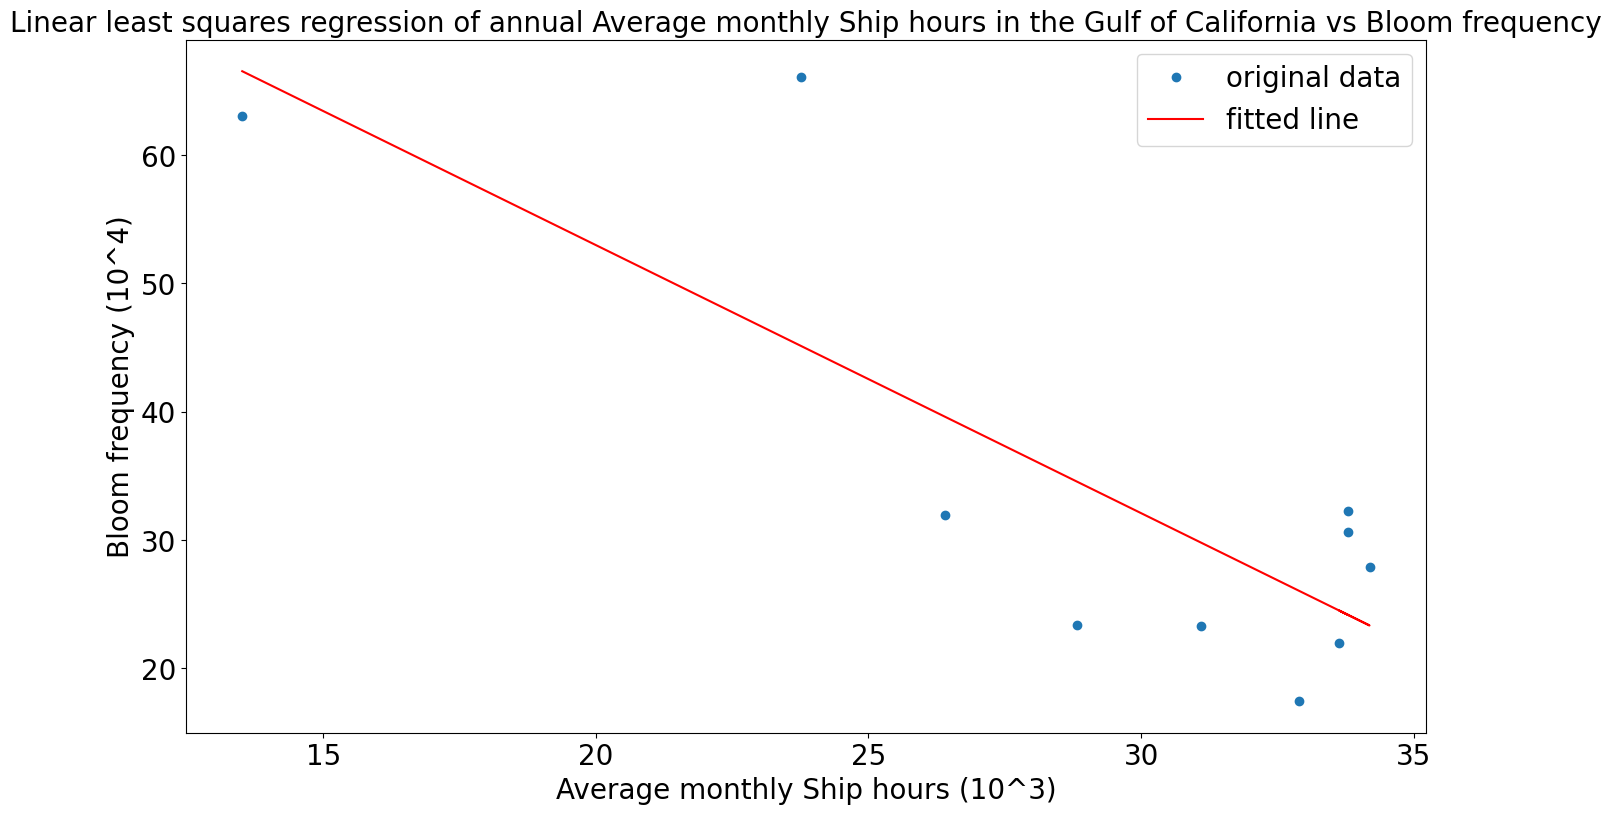

In [24]:
fit_line = result.intercept + result.slope * ship_sum_per_year

fig, ax1 = plt.subplots(figsize = (16, 9))

plt.plot(ship_sum_per_year, bloom_sum_per_year, 'o', label='original data')
plt.plot(ship_sum_per_year, fit_line, 'r', label='fitted line')
ax1.set_title('Linear least squares regression of annual Average monthly Ship hours in the Gulf of California vs Bloom frequency')
ax1.set_xlabel('Average monthly Ship hours (10^3)')
ax1.set_ylabel('Bloom frequency (10^4)')
plt.legend()
plt.show()

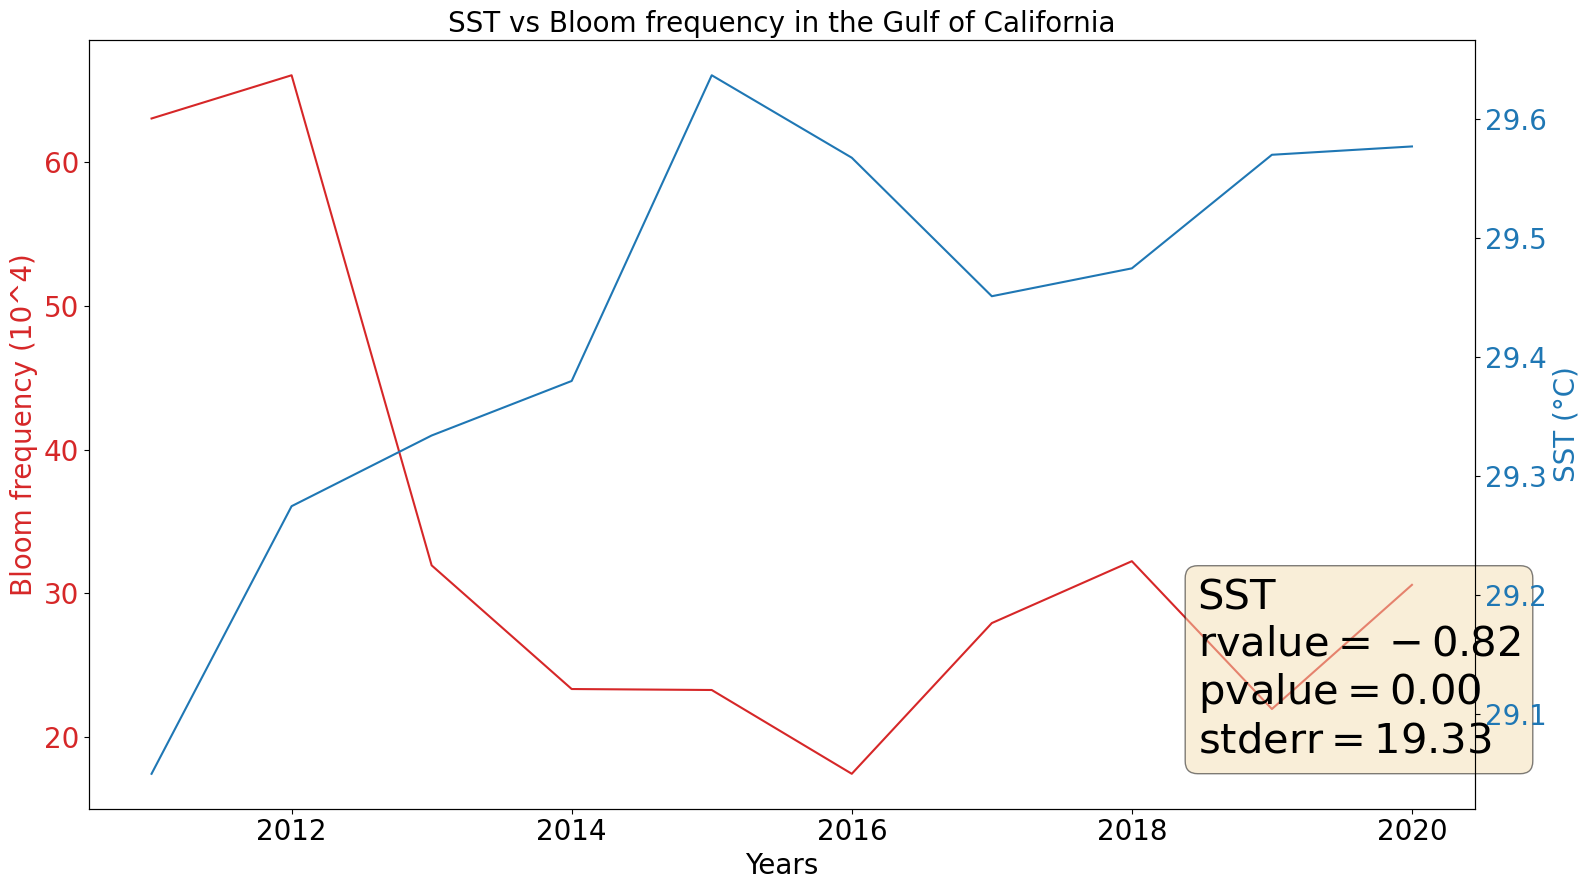

In [25]:
import scipy

sst = np.array([
    29.05009,
    29.274841,
    29.334211,
    29.380013,
    29.636765,
    29.567518,
    29.451185,
    29.4746,
    29.569983,
    29.576979
])

result_sst = scipy.stats.linregress(sst, bloom_sum_per_year)
years = np.arange(2011, 2021)
x = sst
y = bloom_sum_per_year


import matplotlib.pylab as pylab
params = {'legend.fontsize': 20,
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize': 20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)
fig, ax1 = plt.subplots(figsize = (16, 9))


color = 'tab:red'
ax1.set_title('SST vs Bloom frequency in the Gulf of California')
ax1.set_xlabel('Years')
ax1.set_ylabel('Bloom frequency (10^4)', color=color)
ax1.plot(years, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SST (°C)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, x, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

textstr = '\n'.join((
    'SST',
    r'$\mathrm{rvalue}=%.2f$' % (result_sst.rvalue, ),
    r'$\mathrm{pvalue}=%.2f$' % (result_sst.pvalue, ),
    r'$\mathrm{stderr}=%.2f$' % (result_sst.stderr, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.text(0.80, 0.30, textstr, transform=ax1.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.show()

# ax3 = ax1.twinx()
# ax3.spines["right"].set_position(("axes", 1.2))

# color = 'tab:green'
# ax3.set_ylabel('SST (°C)', color=color)
# ax3.plot(years, sst, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# textstr_sst = '\n'.join((
#     'SST',
#     r'$\mathrm{rvalue}=%.2f$' % (result_sst.rvalue, ),
#     r'$\mathrm{pvalue}=%.2f$' % (result_sst.pvalue, ),
#     r'$\mathrm{stderr}=%.2f$' % (result_sst.stderr, )))

# ax1.text(0.05, 0.95, textstr_sst, transform=ax1.transAxes, fontsize=30,
#         verticalalignment='top', bbox=props)

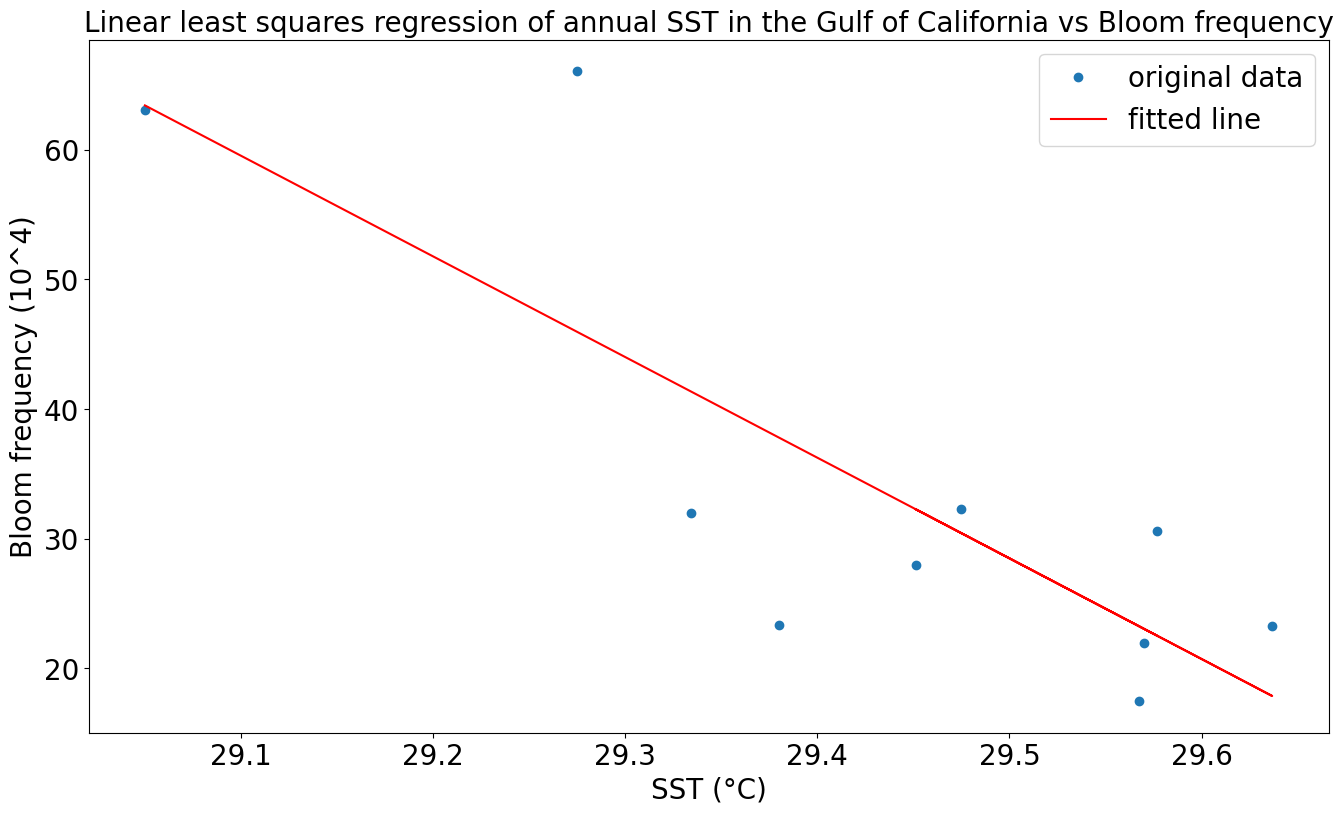

In [26]:
fit_line = result_sst.intercept + result_sst.slope * sst

fig, ax1 = plt.subplots(figsize = (16, 9))

plt.plot(sst, bloom_sum_per_year, 'o', label='original data')
plt.plot(sst, fit_line, 'r', label='fitted line')
ax1.set_title('Linear least squares regression of annual SST in the Gulf of California vs Bloom frequency')
ax1.set_xlabel('SST (°C)')
ax1.set_ylabel('Bloom frequency (10^4)')
plt.legend()
plt.show()